# Кластеризация. Метод k-средних (k-means)

[Rand_index](https://en.wikipedia.org/wiki/Rand_index) <br>
[Jaccard_index](https://en.wikipedia.org/wiki/Jaccard_index) <br>
[FM](https://en.wikipedia.org/wiki/FM-index)  - сжатый индекс <br>



Метод k-means – это один из наиболее популярных методов кластеризации. Основная идея метода заключается в том, что на каждой итерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры согласно тому, какой из новых центроидов находится ближе.

Более формально, алгоритм принимает на вход выборку $X_1, \dots, X_N$ и параметр $k$, указывающий необходимое число кластеров. Выходом алгоритма является набор из $k$ центроидов $\{\mu_1, \dots, \mu_k\}$, с помощью которых кластеризация осуществляется путём отнесения каждого объекту к ближайшему центроиду. Все точки внутри одного кластера ближе к центроиду этого кластера, чем к центроиду любого другого кластера.

Метод может быть сформулирован как задача оптимизации, а именно, минимизации суммарного квадратичного отклонения точек кластеров от центров этих кластеров по центроидам и кластерам:
$$\sum_{i=1}^k \sum_{X_n \in C_i} ||X_n - \mu_i||^2 \rightarrow \min, \text{где $C_i$ - это $i$-ый кластер, $\mu_i$ - это центр масс кластера $C_i$.}$$

Решение такой задачи оптимизации является NP-трудной задачей, однако существует простой итеративный алгоритм, позволяющий найти локальный минимум указанного функционала. Алгоритм представляет собой последовательное чередование двух шагов до сходимости. 

Предположим, что как-то (например, случайно) выбраны начальные положения центроидов $\mu_1, \dots, \mu_k$.

1) *Этап кластеризациu.* На данном этапе происходит кластеризация выборки, как было описано выше: каждый объект относится к кластеру ближайшего к нему центроида. Формально, $$C_i = \{X_n : ||X_n - \mu_i|| \leq ||X_n - \mu_j||, \text{ для всех $j \in \{1, \dots, k\}$}\}.$$

2) *Этап обновления центроидов.* На данном этапе центроиды пересчитываются, как центры масс только что построенных кластеров. Формально, $$\mu_i = \frac{1}{|C_i|}\sum_{X_n \in C_i} X_n.$$

Этот процесс продолжается, пока центроиды и кластеризация продолжают изменяться. Алгоритм гарантированно сходится, однако не гарантируется достижение глобального минимума – а только одного из локальных минимумов. Другим недостатком алгоритма является то, что итоговая кластеризация зависит от выбора исходных центров кластеров. На практике алгоритм запускается несколько раз из различных начальных приближений, а полученные результаты некоторым образом усредняются. Стоит также отметить, что число кластеров необходимо знать заранее. Существуют различные эвристики, позволяющие выбирать в некотором смысле оптимальное число кластеров.

### Пример: кластеризация игроков NBA

Про <a href="http://www.databasebasketball.com/about/aboutstats.htm">признаки</a> игроков.

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

nba = pd.read_csv("nba_2013.csv")
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [19]:
nba['pos_label']=le.fit_transform(nba['pos'])

In [22]:
nba['pos_label'].value_counts()

6    109
5     99
3     96
0     90
4     85
2      1
1      1
Name: pos_label, dtype: int64

In [23]:
nba['pos'].value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

In [24]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end', 'pos_label'],
      dtype='object')

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


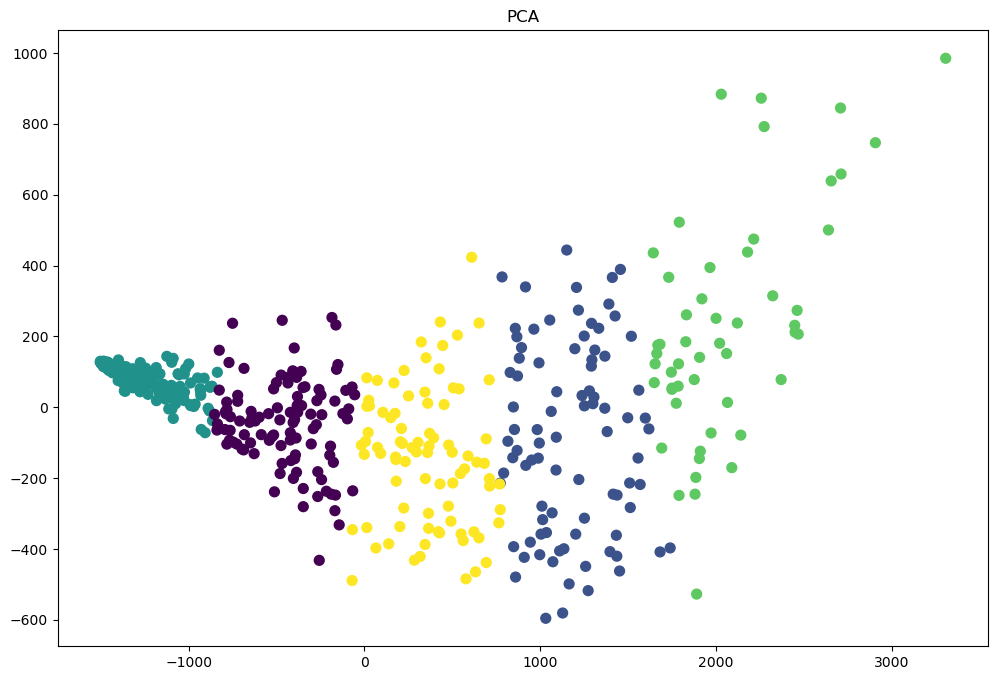

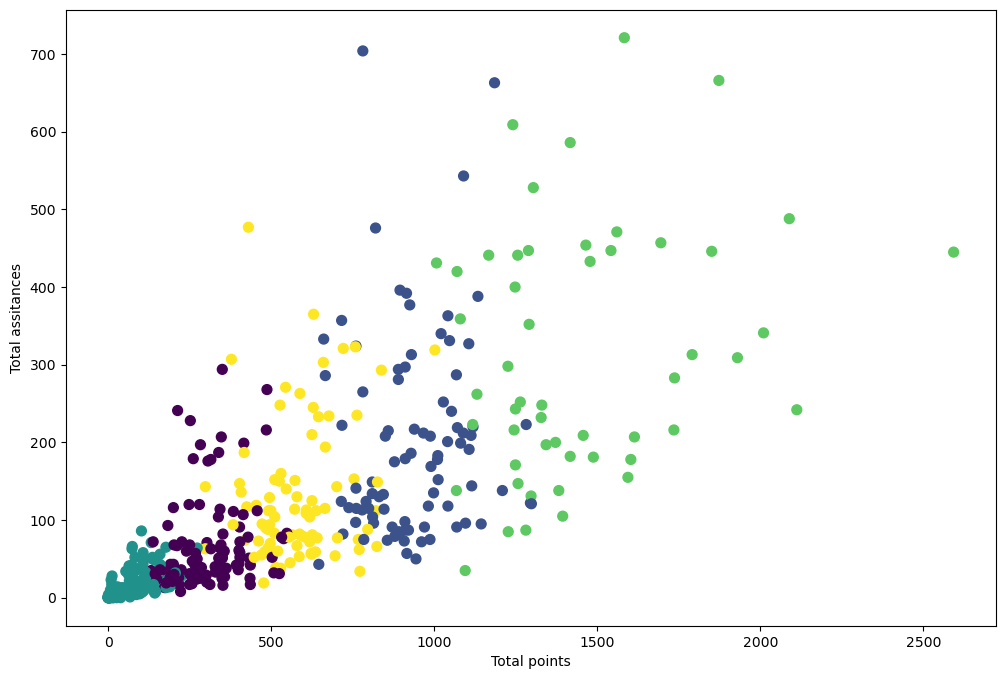

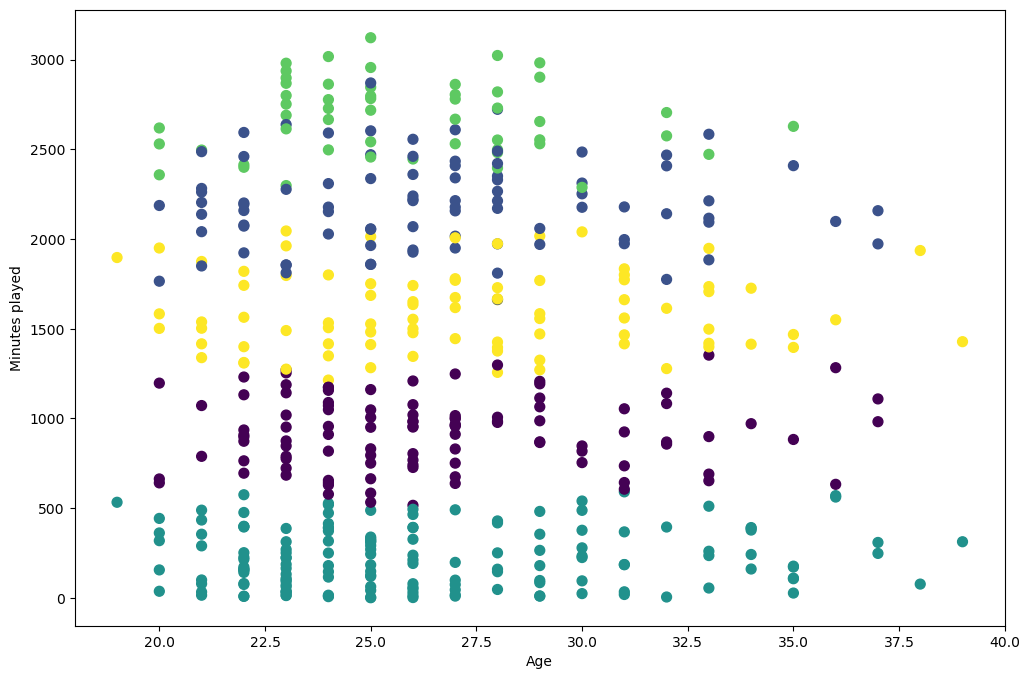

In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5, random_state=1)
numeric_cols = nba._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)


# Visualizing using PCA
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Visualizing using 2 features: Total points vs. Total assists
plt.figure(figsize=(12,8))
plt.scatter(nba['pts'], nba['ast'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Total points')
plt.ylabel('Total assitances')

# Visualizing using 2 features: Age vs. Minutes played
plt.figure(figsize=(12,8))
plt.scatter(nba['age'], nba['mp'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Minutes played');

#Задание слушатиелем:

- С использованием пройденного материала посчитайте число кластеров и визуализируйте их 
data -> TSNE(UMAP) -> считаем метрики (для ситуации когда мы не знаем число классов) -> Визуализируем метрики и кластеры. 


In [26]:
numeric_cols = nba._get_numeric_data().dropna(axis=1)

In [27]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
#X_scaled=scaler.fit_transform(X_tsne)
X_scaled=numeric_cols
for i in range(2,15):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 2: -208969205.22472584
Silhouette score for number of cluster(s) 2: 0.586872857044789
Davies Bouldin score for number of cluster(s) 2: 0.592197531899483


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 3: -123732184.21117413
Silhouette score for number of cluster(s) 3: 0.5074992335479793
Davies Bouldin score for number of cluster(s) 3: 0.7004076731366609


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 4: -88484806.70362133
Silhouette score for number of cluster(s) 4: 0.4666067605279688
Davies Bouldin score for number of cluster(s) 4: 0.8328536321282878


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 5: -72362999.11824939
Silhouette score for number of cluster(s) 5: 0.4282206967276095
Davies Bouldin score for number of cluster(s) 5: 0.944178108335646


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 6: -63031169.32196057
Silhouette score for number of cluster(s) 6: 0.40730884112297344
Davies Bouldin score for number of cluster(s) 6: 1.0627220231957109


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 7: -56495251.34484624
Silhouette score for number of cluster(s) 7: 0.41985403478447203
Davies Bouldin score for number of cluster(s) 7: 1.0171714731873684


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 8: -50160842.02585535
Silhouette score for number of cluster(s) 8: 0.37616833113016485
Davies Bouldin score for number of cluster(s) 8: 1.022001474876823


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 9: -46366822.40589822
Silhouette score for number of cluster(s) 9: 0.37452882828288436
Davies Bouldin score for number of cluster(s) 9: 1.0798334168763395


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 10: -43552851.72152047
Silhouette score for number of cluster(s) 10: 0.35179342901797356
Davies Bouldin score for number of cluster(s) 10: 1.1533724914741383


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 11: -41175492.987401225
Silhouette score for number of cluster(s) 11: 0.3545745296662031
Davies Bouldin score for number of cluster(s) 11: 1.1251867378905194


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 12: -38758941.73355326
Silhouette score for number of cluster(s) 12: 0.3581090350982626
Davies Bouldin score for number of cluster(s) 12: 1.1295959486407614


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 13: -37398365.55915341
Silhouette score for number of cluster(s) 13: 0.3212746528334779
Davies Bouldin score for number of cluster(s) 13: 1.1319871469526006


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 14: -35436781.04941362
Silhouette score for number of cluster(s) 14: 0.32195672727008523
Davies Bouldin score for number of cluster(s) 14: 1.1313381157466027


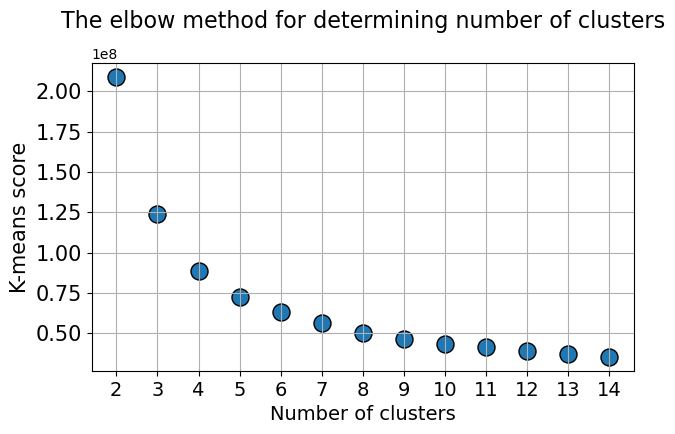

In [7]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

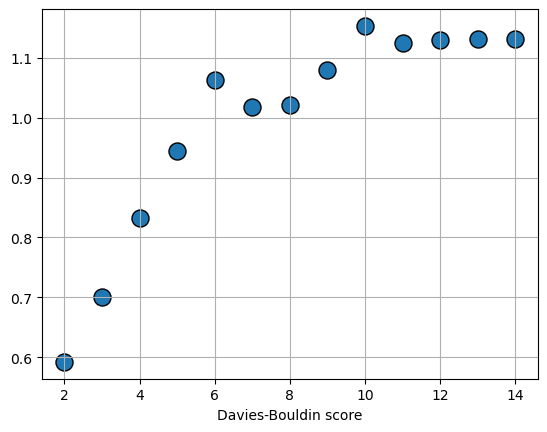

In [8]:
plt.scatter(x=[i for i in range(2,15)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

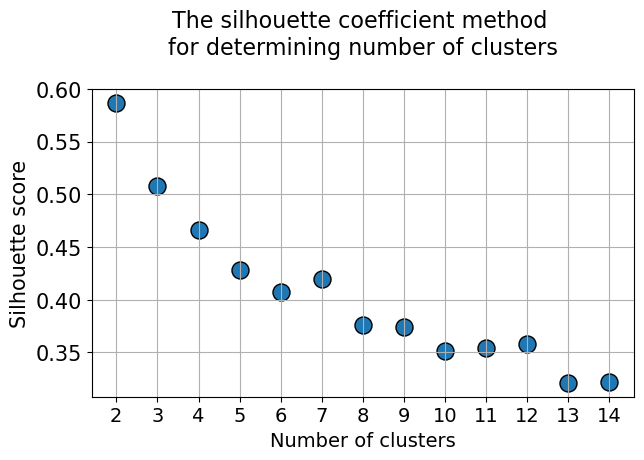

In [9]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)

plt.show()

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42,n_components=2)
# используем метод fit_transform вместо fit, т.к. класс TSNE не использует метод transform
X_tsne = tsne.fit_transform(numeric_cols)

c:\Users\andru\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\andru\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 0, 't-SNE признак 1')

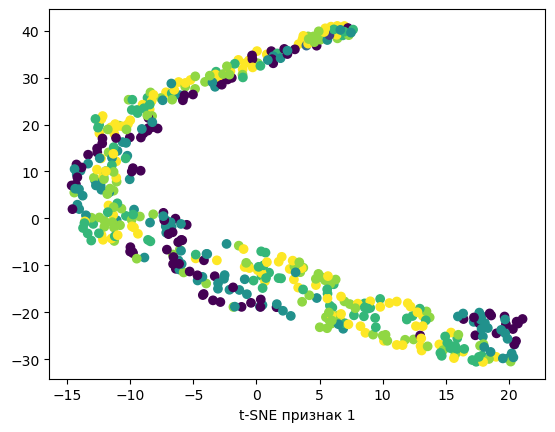

In [28]:
import matplotlib.pyplot as pp
pp.scatter(X_tsne[:,0],X_tsne[:,1],c=numeric_cols['pos_label']);
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1")

In [29]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
#X_scaled=scaler.fit_transform(X_tsne)
X_scaled=X_tsne
for i in range(2,15):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 2: -86778.2734375
Silhouette score for number of cluster(s) 2: 0.5824299454689026
Davies Bouldin score for number of cluster(s) 2: 0.6000620180195871


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 3: -39977.921875
Silhouette score for number of cluster(s) 3: 0.5580681562423706
Davies Bouldin score for number of cluster(s) 3: 0.5544683471888453


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 4: -24046.4765625
Silhouette score for number of cluster(s) 4: 0.5334486365318298
Davies Bouldin score for number of cluster(s) 4: 0.5660539886386826


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 5: -15150.875
Silhouette score for number of cluster(s) 5: 0.5323538184165955
Davies Bouldin score for number of cluster(s) 5: 0.5592134696643378


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 6: -11526.23828125
Silhouette score for number of cluster(s) 6: 0.511766791343689
Davies Bouldin score for number of cluster(s) 6: 0.5756845316100413


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 7: -8826.765625
Silhouette score for number of cluster(s) 7: 0.49758023023605347
Davies Bouldin score for number of cluster(s) 7: 0.611580643782479


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 8: -7180.99560546875
Silhouette score for number of cluster(s) 8: 0.4943360388278961
Davies Bouldin score for number of cluster(s) 8: 0.5981630351979517


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 9: -6075.6728515625
Silhouette score for number of cluster(s) 9: 0.4727712869644165
Davies Bouldin score for number of cluster(s) 9: 0.6627271784665232


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 10: -5452.92822265625
Silhouette score for number of cluster(s) 10: 0.4825545847415924
Davies Bouldin score for number of cluster(s) 10: 0.695365901565849


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 11: -4792.95068359375
Silhouette score for number of cluster(s) 11: 0.4813372492790222
Davies Bouldin score for number of cluster(s) 11: 0.6742062079543295


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 12: -4214.13916015625
Silhouette score for number of cluster(s) 12: 0.46351221203804016
Davies Bouldin score for number of cluster(s) 12: 0.6999738890937439


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 13: -3783.39892578125
Silhouette score for number of cluster(s) 13: 0.4595594108104706
Davies Bouldin score for number of cluster(s) 13: 0.7251539342962914


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 14: -3481.49462890625
Silhouette score for number of cluster(s) 14: 0.44175782799720764
Davies Bouldin score for number of cluster(s) 14: 0.735457383508672


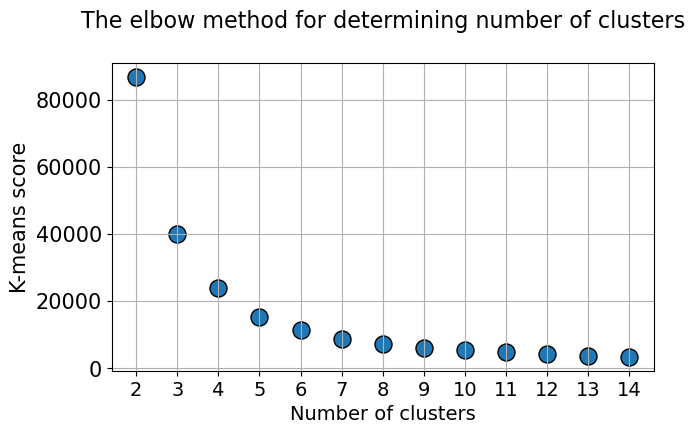

In [30]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

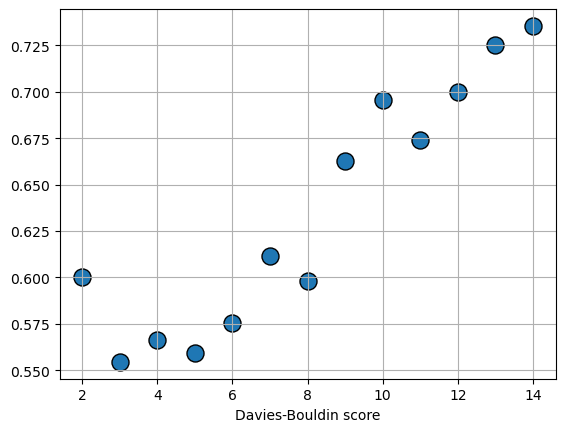

In [31]:
plt.scatter(x=[i for i in range(2,15)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

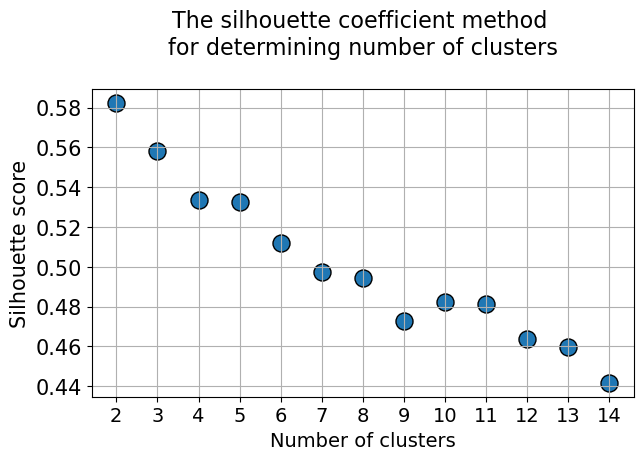

In [32]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)

plt.show()

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


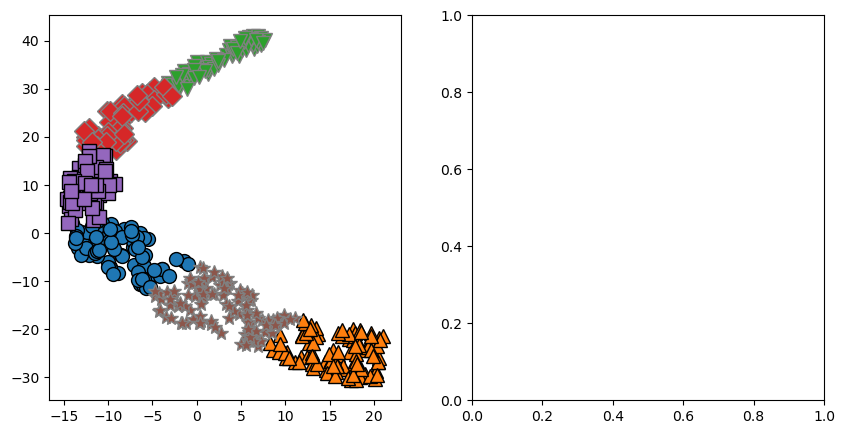

In [33]:
import mglearn
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
km_tsne = KMeans(n_clusters=6, random_state=0).fit(X_tsne)
assignments = km_tsne.labels_
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], assignments, ax=axes[0])

In [36]:
import mglearn
import umap
reducer = umap.UMAP()
reducer.fit(numeric_cols)
X_umap = reducer.transform(numeric_cols)

c:\Users\andru\anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11102. The TBB threading layer is disabled.
  warnings.warn(problem)


Text(0.5, 0, 't-SNE признак 1')

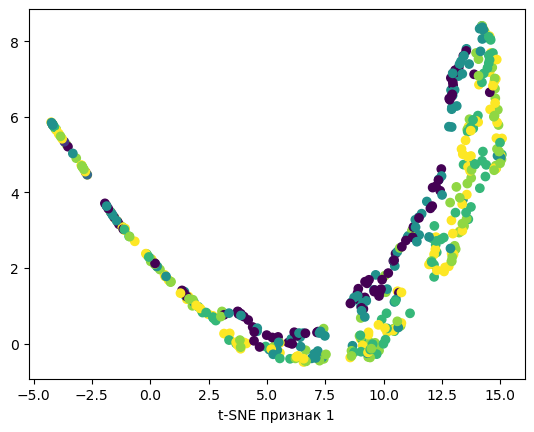

In [37]:
import matplotlib.pyplot as pp
pp.scatter(X_umap[:,0],X_umap[:,1],c=numeric_cols['pos_label']);
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1")

In [38]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
#X_scaled=scaler.fit_transform(X_tsne)
X_scaled=X_umap
for i in range(2,15):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 2: -6282.37255859375
Silhouette score for number of cluster(s) 2: 0.5917506217956543
Davies Bouldin score for number of cluster(s) 2: 0.617020564023047


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 3: -2872.482421875
Silhouette score for number of cluster(s) 3: 0.5734438300132751
Davies Bouldin score for number of cluster(s) 3: 0.5616450085010761


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 4: -1650.4945068359375
Silhouette score for number of cluster(s) 4: 0.5591319799423218
Davies Bouldin score for number of cluster(s) 4: 0.5486652148038348


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 5: -1149.627685546875
Silhouette score for number of cluster(s) 5: 0.5272942781448364
Davies Bouldin score for number of cluster(s) 5: 0.5694337995312702


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 6: -782.6983642578125
Silhouette score for number of cluster(s) 6: 0.5421634912490845
Davies Bouldin score for number of cluster(s) 6: 0.5605636199482088


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 7: -593.0553588867188
Silhouette score for number of cluster(s) 7: 0.5587978363037109
Davies Bouldin score for number of cluster(s) 7: 0.5332575758969637


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 8: -448.4790954589844
Silhouette score for number of cluster(s) 8: 0.5395023226737976
Davies Bouldin score for number of cluster(s) 8: 0.5821191961718855


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 9: -378.3082275390625
Silhouette score for number of cluster(s) 9: 0.5419263243675232
Davies Bouldin score for number of cluster(s) 9: 0.5545468357092391


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 10: -333.5776062011719
Silhouette score for number of cluster(s) 10: 0.5102920532226562
Davies Bouldin score for number of cluster(s) 10: 0.6412490440008736


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 11: -295.90472412109375
Silhouette score for number of cluster(s) 11: 0.5119427442550659
Davies Bouldin score for number of cluster(s) 11: 0.6292499609480096


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 12: -261.80389404296875
Silhouette score for number of cluster(s) 12: 0.48717525601387024
Davies Bouldin score for number of cluster(s) 12: 0.6844698179418631


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 13: -227.5595703125
Silhouette score for number of cluster(s) 13: 0.49299490451812744
Davies Bouldin score for number of cluster(s) 13: 0.6711013724912565


c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Score for number of cluster(s) 14: -210.2696075439453
Silhouette score for number of cluster(s) 14: 0.495317667722702
Davies Bouldin score for number of cluster(s) 14: 0.6703252506126673


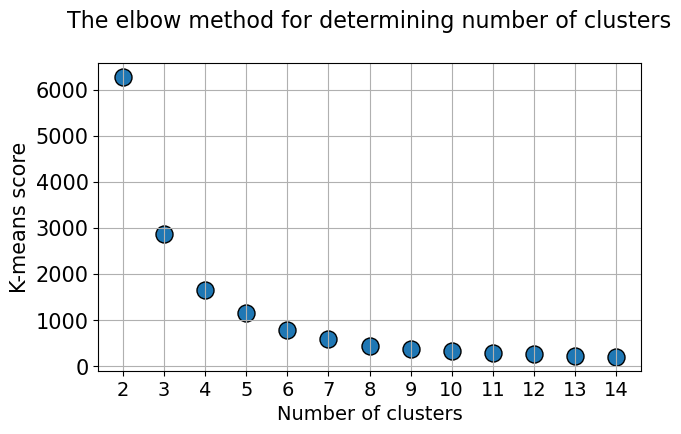

In [39]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

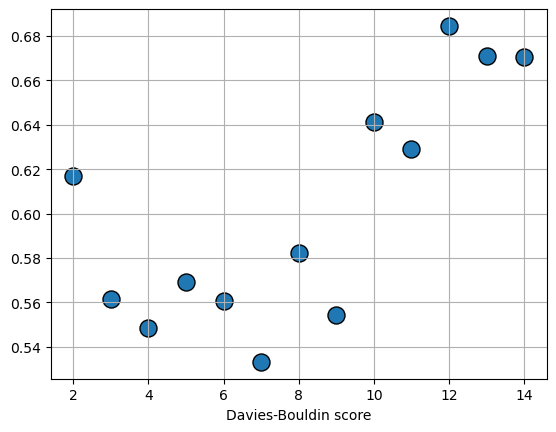

In [40]:
plt.scatter(x=[i for i in range(2,15)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

(array([0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

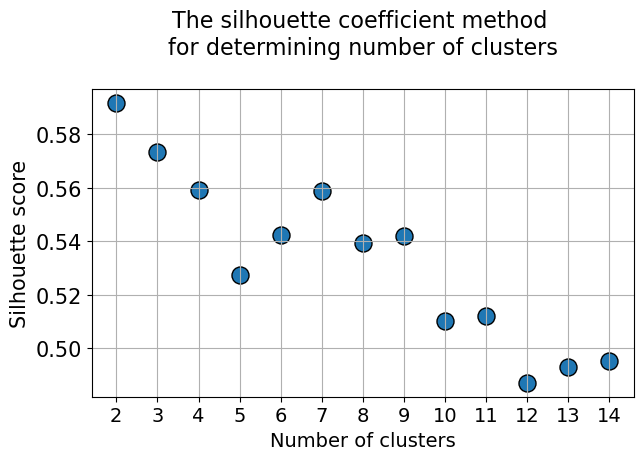

In [41]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)

### Инициализация центроидов

Метод `sklearn.KMeans` содержит параметры `n_init` (число запусков из различных начальных приближений) и `init`. Есть три способа инициализации центроидов:
- `k-means++` – "умная" инициализация центроидов для ускорения сходимости.
- `random` – случайная инициализация центроидов.
- `ndarray` – заданная инициализация центроидов.

## Сжатие изображений с K-means

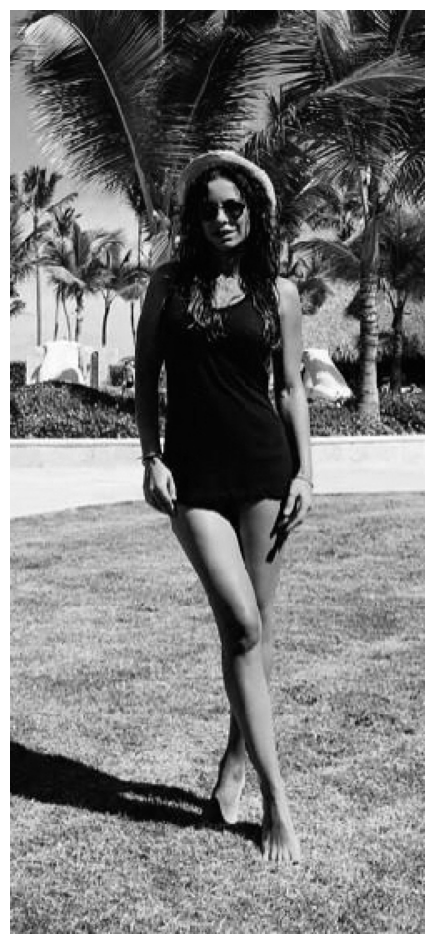

In [42]:
import matplotlib.image as mpimg
img = mpimg.imread('woman.jpg')[..., 1]
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img, cmap='gray');

In [44]:
img.reshape((-1, 1)).shape

(138195, 1)

c:\Users\andru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


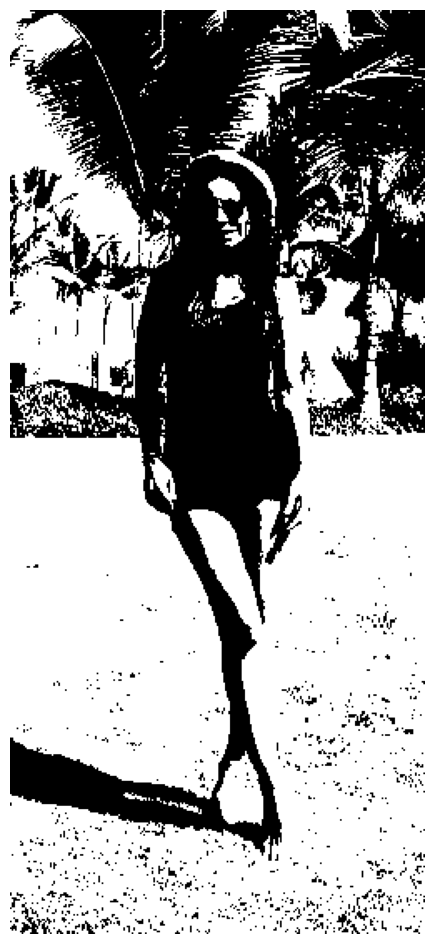

In [49]:
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import randint

X = img.reshape((-1, 1))
k_means = MiniBatchKMeans(n_clusters=2)
k_means.fit(X) 
values = k_means.cluster_centers_
labels = k_means.labels_
img_compressed = values[labels].reshape(img.shape)
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'gray');

# Нахождение тем в текстах

**Применим KMeans для кластеризации текстов из 4 новостных категорий.**

In [50]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from time import time

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories


**Закодируем тексты с помощью TF-IDF признаков.**

In [51]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 3387, n_features: 1000


In [56]:
X.data.shape.reshape

(160796,)

**И применим к получившимся векторам метод $k$ средних.**

In [57]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Clustering sparse data with KMeans(max_iter=100, n_clusters=4, n_init=1)
Homogeneity: 0.514
Completeness: 0.600
V-measure: 0.553
Adjusted Rand-Index: 0.506
Silhouette Coefficient: 0.017


In [58]:
true_k

4

**Выведем слова, соответствующие самым весомым компонентам центров кластеров.**

In [10]:
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: com access digex pat article posting host nntp net ibm
Cluster 2: god com people sandvik don jesus keith say article think
Cluster 3: graphics university thanks image ac file uk 3d computer files
Cluster 4: space nasa henry gov toronto alaska moon shuttle launch zoo


c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Кластеризация рукописных цифр

In [59]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

In [60]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

In [61]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, kmeans.predict(X))

0.6661263890665903

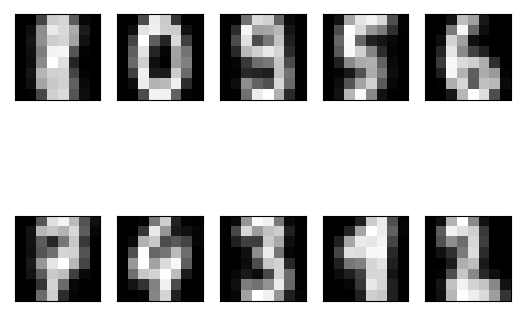

In [62]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

## Полезные ссылки
- <a href="https://en.wikipedia.org/wiki/K-means_clustering">k-means</a> на Википедии
- <a href="">Статья</a> про нечеткую кластеризацию городов по социально-экономическим показателям на Хабрахабре